In [ ]:
#!pip install category_encoders
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

test_file = '/content/drive/MyDrive/GroupWorks/IDS575/Project/test.csv'
train_file = '/content/drive/MyDrive/GroupWorks/IDS575/Project/train.csv'

test = pd.read_csv(test_file)
train = pd.read_csv(train_file)
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-84-a069988838dd>:10: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_file)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# EDA

In [ ]:
train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

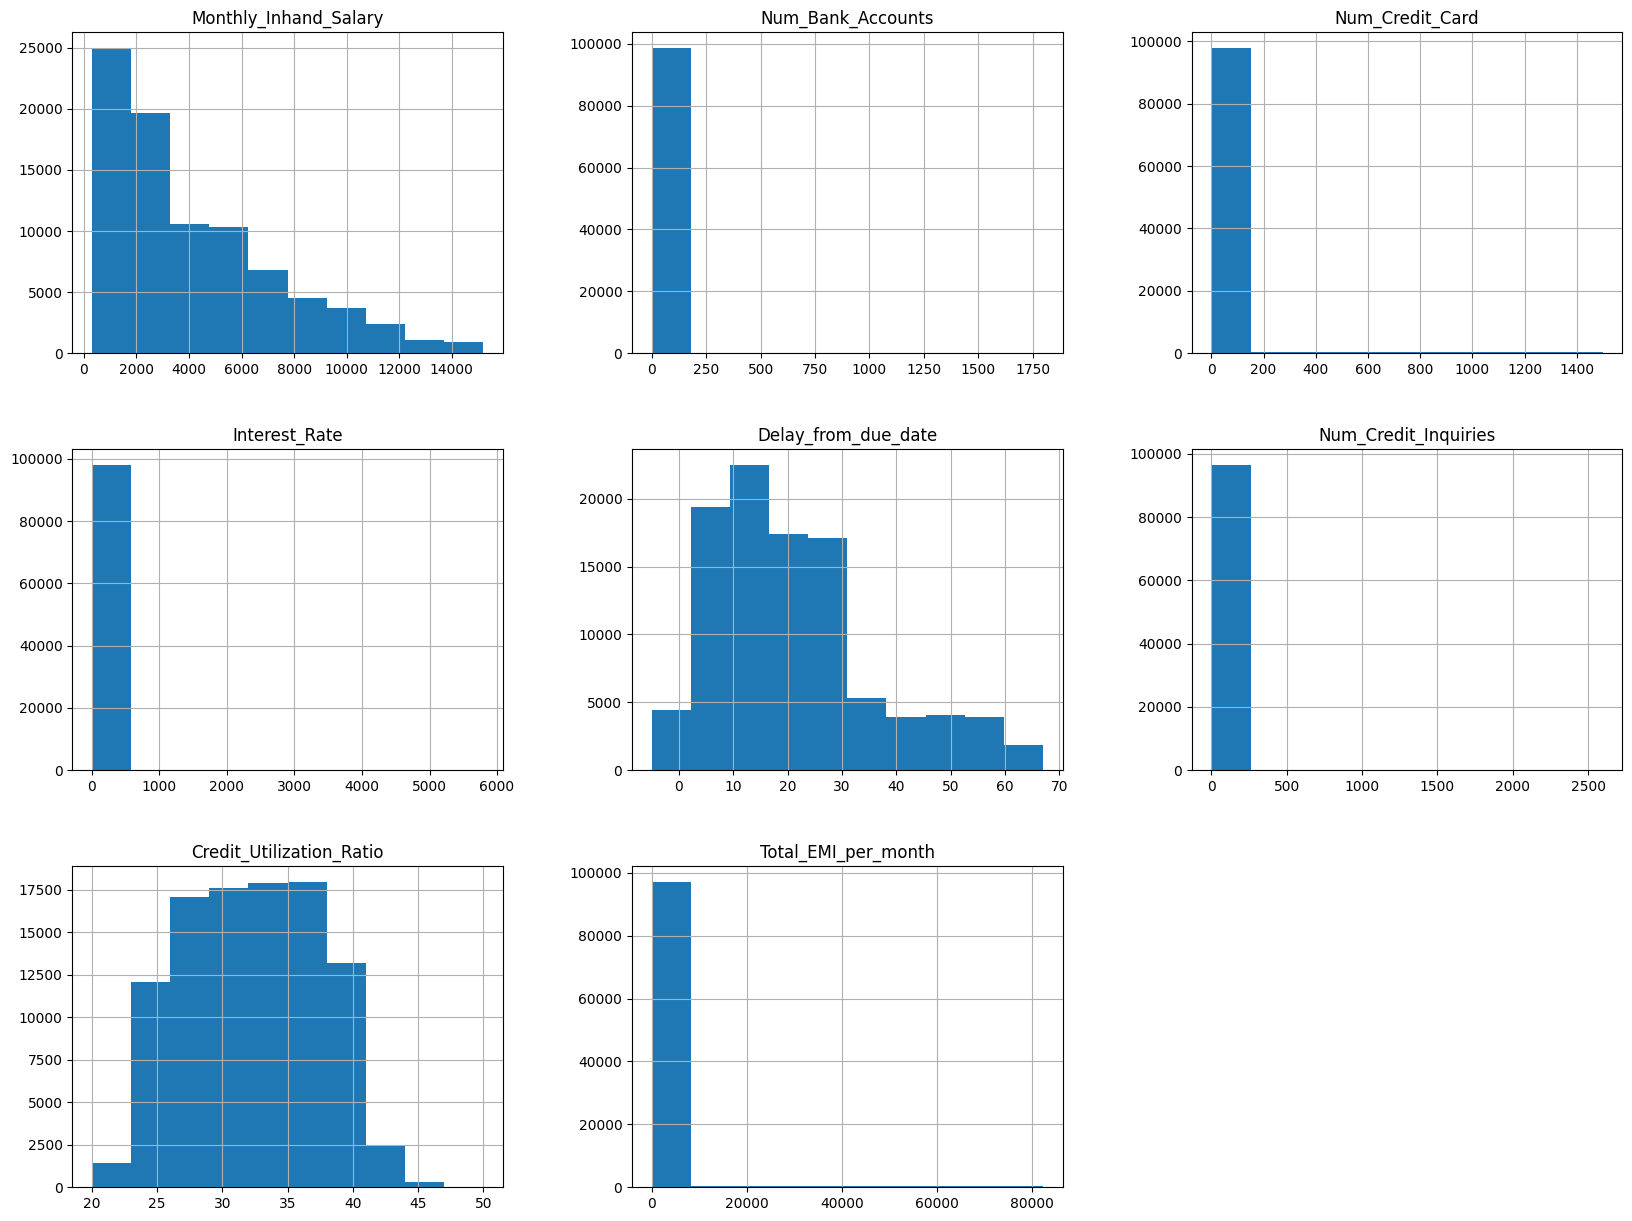

In [ ]:

train.hist(figsize=(20, 15))
plt.show()

In [ ]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
train.shape

(100000, 28)

In [ ]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

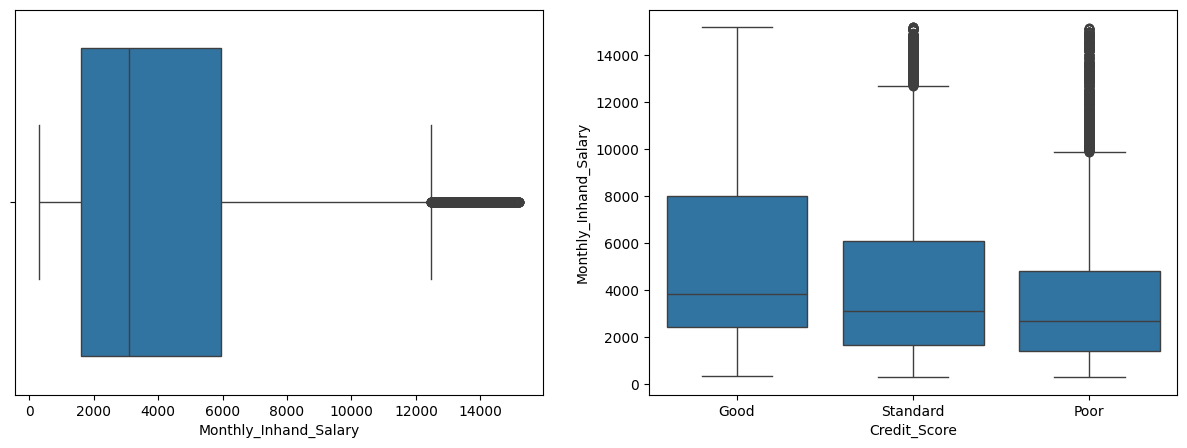

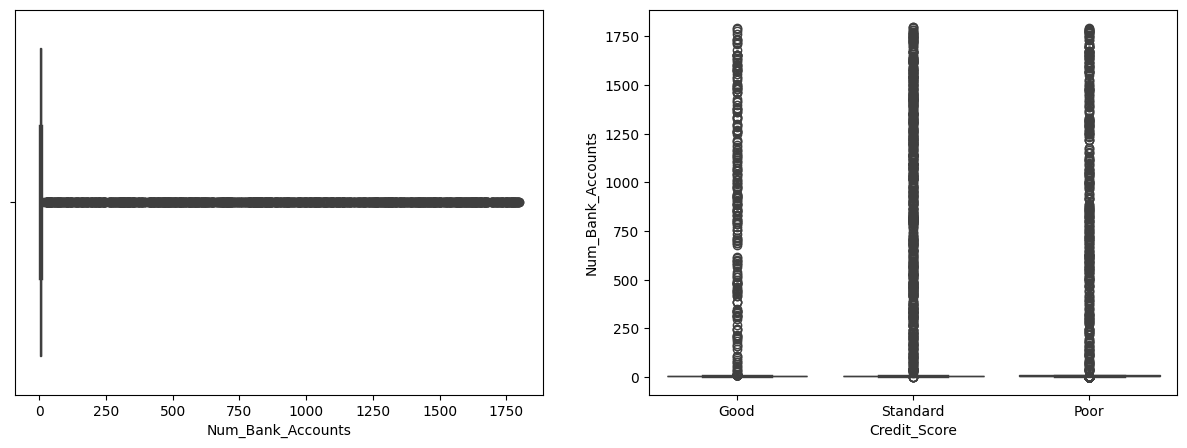

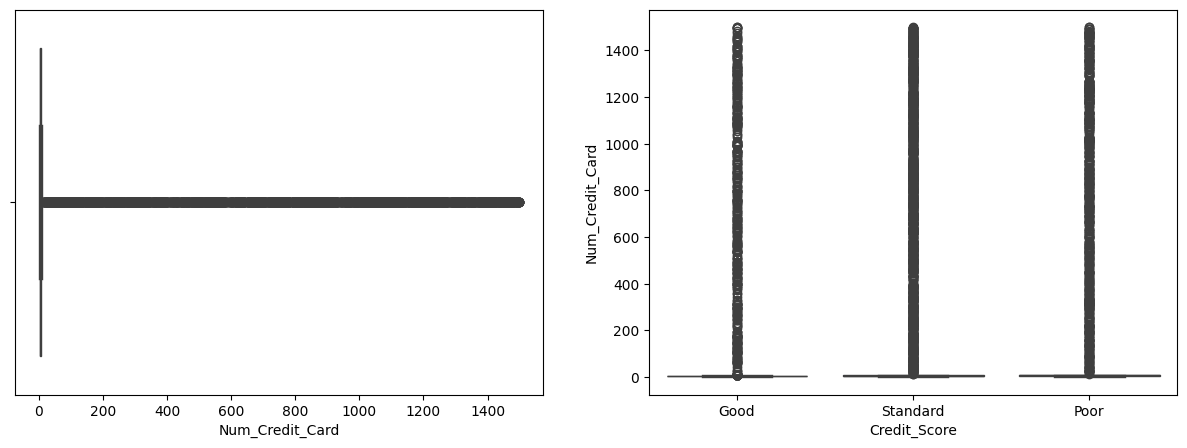

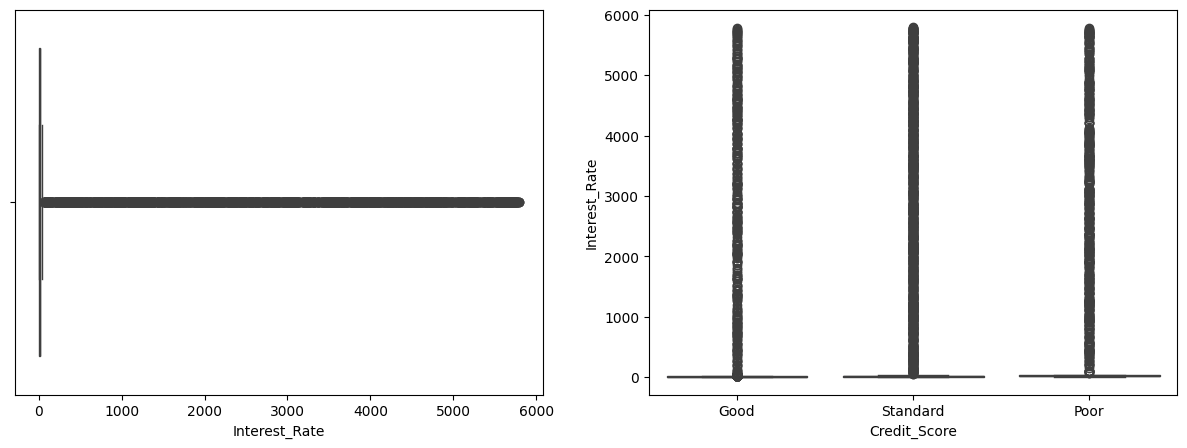

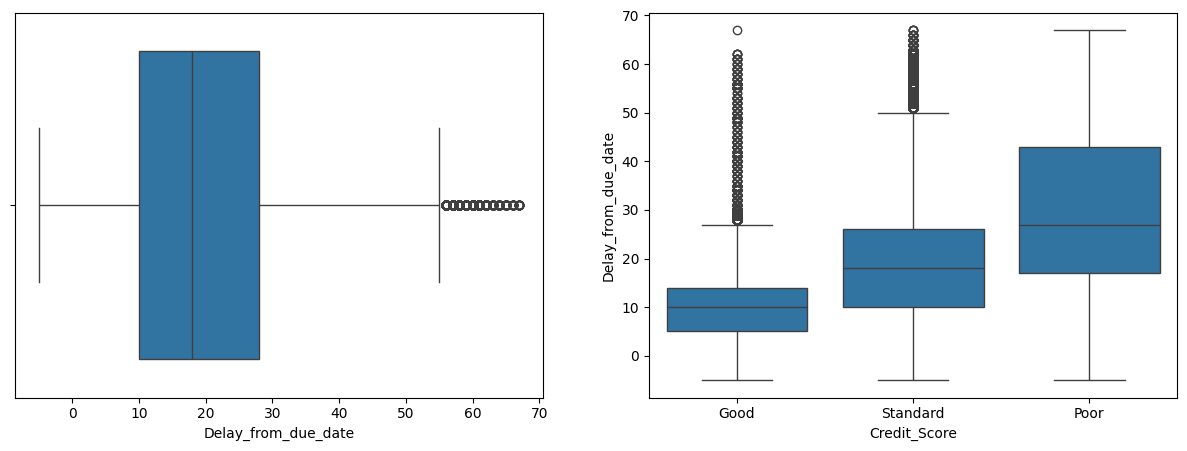

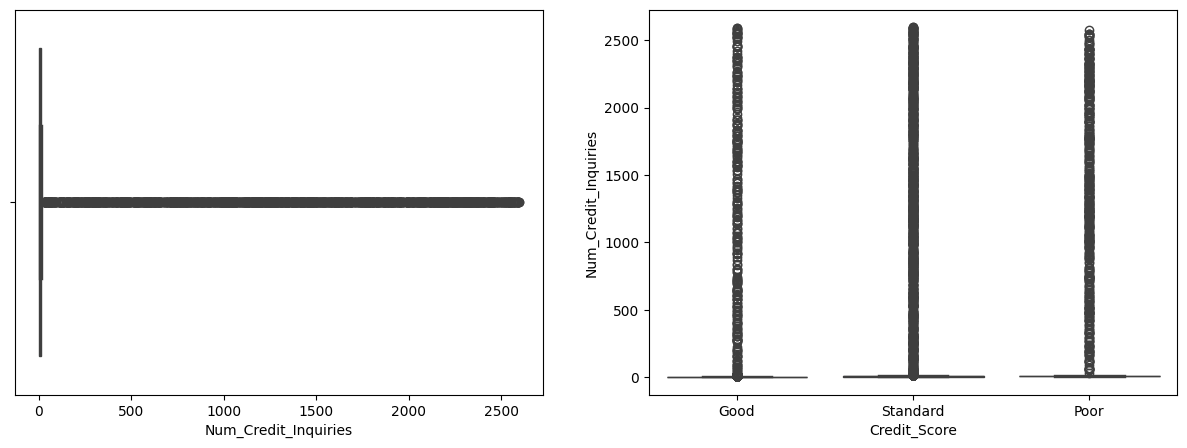

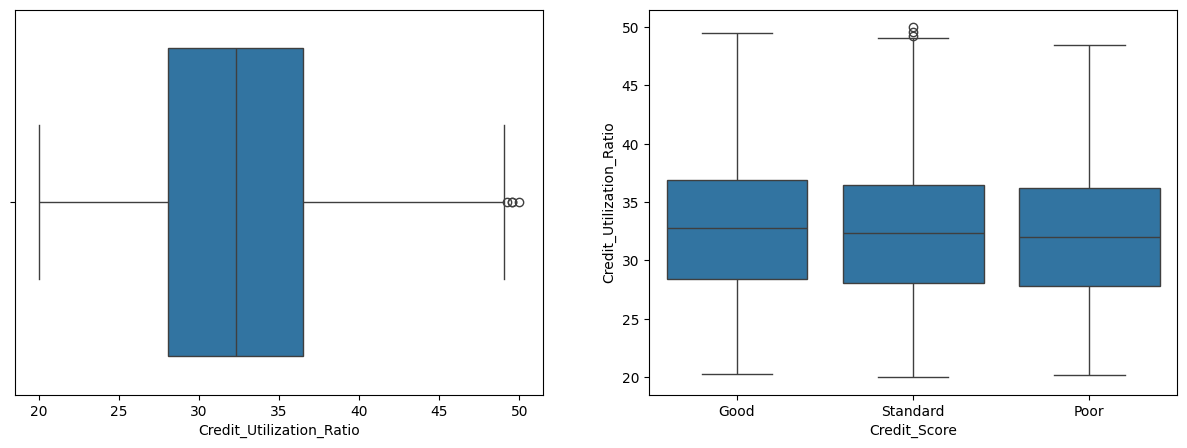

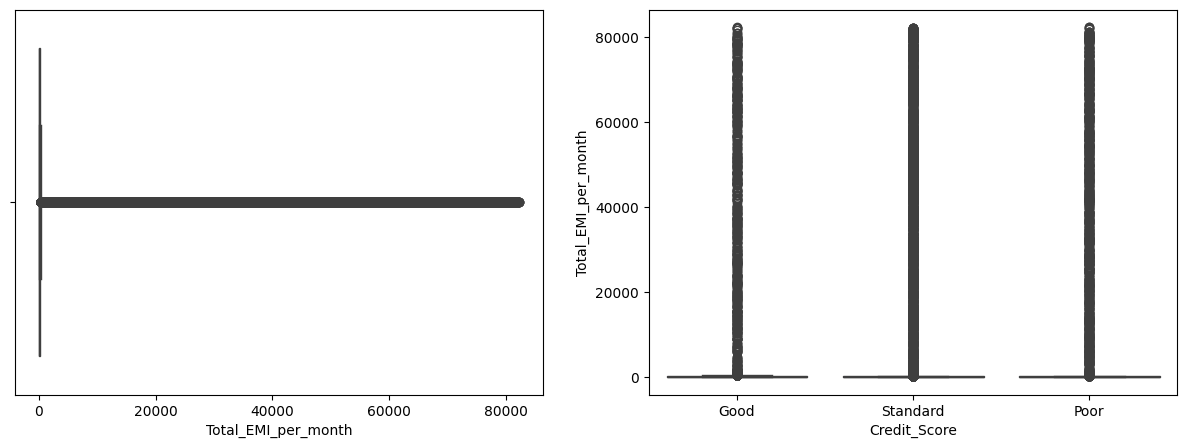

In [ ]:
for col in train.select_dtypes(include = np.number):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, data =train)
    plt.subplot(1,2,2)
    sns.boxplot(x='Credit_Score',y=col, data =train)
    plt.show()

In [ ]:
columns=[
      'Credit_Score']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [ ]:
train['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

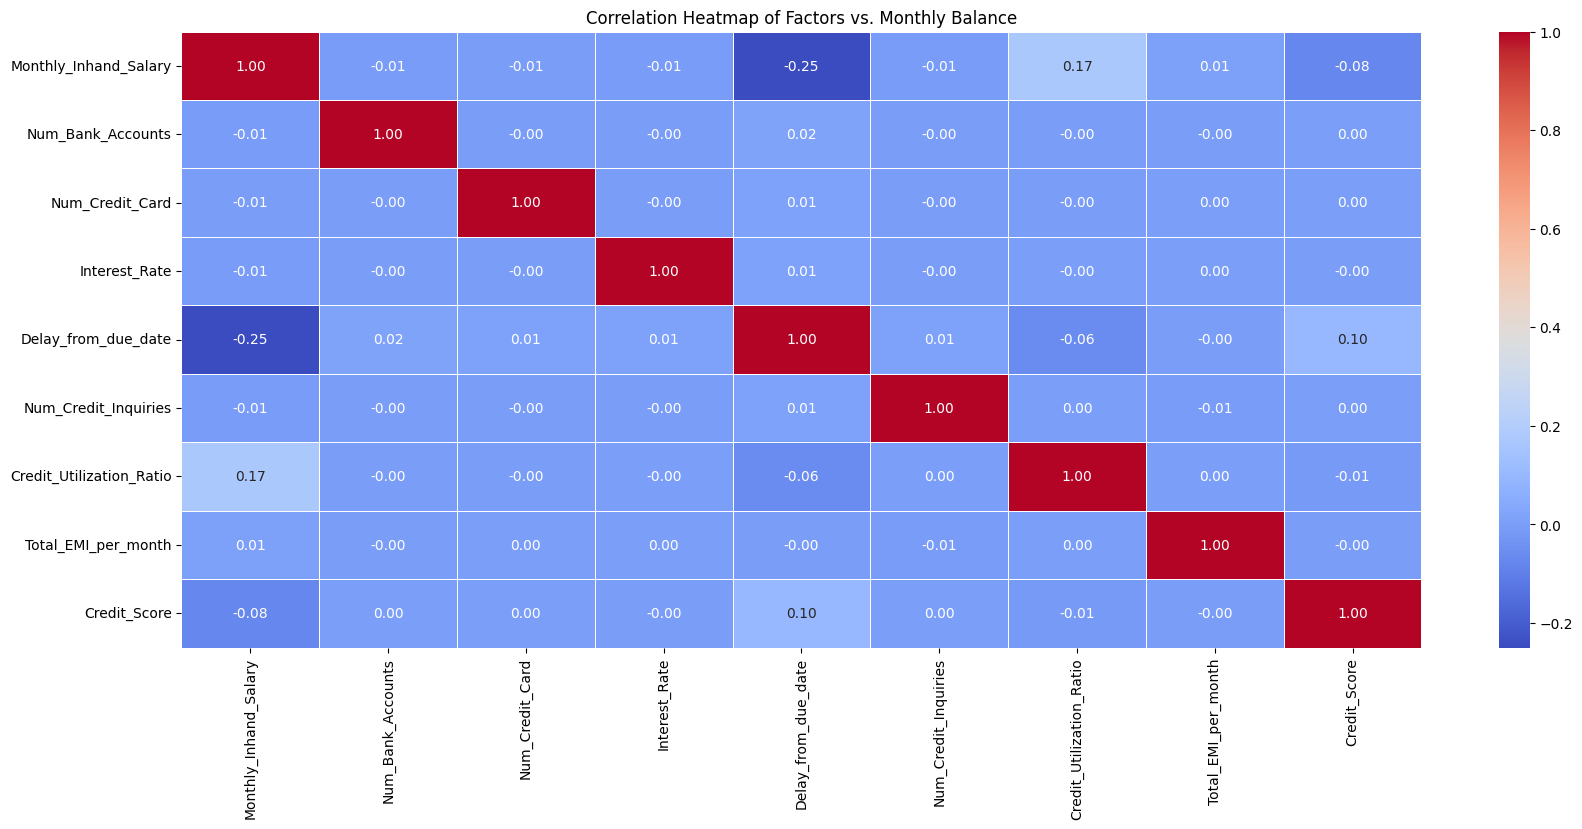

In [ ]:
selected_columns = train.select_dtypes(include=['number'])

correlation_matrix = selected_columns.corr()


plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

In [ ]:
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    train[item] = ce.LeaveOneOutEncoder().fit_transform(train[item],train['Credit_Score'])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,0.0,23,821-00-0265,1.337409,19114.12,1824.843333,3,...,1.350748,809.98,26.822620,22 Years and 1 Months,1.099647,49.574949,80.41529543900253,1.354970,312.49408867943663,0
1,0x1603,CUS_0xd40,February,0.0,23,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,31.944960,NaN,1.099647,49.574949,118.28022162236736,1.358308,284.62916249607184,0
2,0x1604,CUS_0xd40,March,0.0,-500,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,28.609352,22 Years and 3 Months,1.099647,49.574949,81.699521264648,1.338167,331.2098628537912,0
3,0x1605,CUS_0xd40,April,0.0,23,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,31.377862,22 Years and 4 Months,1.099647,49.574949,199.4580743910713,1.385818,223.45130972736786,0
4,0x1606,CUS_0xd40,May,0.0,23,821-00-0265,1.337409,19114.12,1824.843333,3,...,0.865508,809.98,24.797347,22 Years and 5 Months,1.099647,49.574949,41.420153086217326,1.345174,341.48923103222177,0


In [ ]:
train[['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']]

,Payment_of_Min_Amount,Payment_Behaviour,Name,Occupation,Credit_Mix
0,1.099647,1.354970,0.000000,1.337409,1.350748
1,1.099647,1.358308,0.000000,1.337409,0.865508
2,1.099647,1.338167,0.000000,1.337409,0.865508
3,1.099647,1.385818,0.000000,1.337409,0.865508
4,1.099647,1.345174,0.000000,1.337409,0.865508
...,...,...,...,...,...
99995,1.099619,1.320554,1.285714,1.373132,1.350698
99996,1.099619,1.345117,1.285714,1.373132,1.350698
99997,1.099619,1.320554,1.285714,1.373132,0.865467
99998,1.099591,1.358116,1.142857,1.372973,0.865426


In [ ]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                        float64
Age                          object
SSN                          object
Occupation                  float64
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance              object
Credit_Score                

In [ ]:
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Outstanding_Debt','Total_EMI_per_month']
for item in columns2:
    mean_encoding = train.groupby([item])['Credit_Score'].mean()
    train[item] = train[item].map(mean_encoding)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,0.0,1.383130,821-00-0265,1.337409,0.25,1824.843333,3,...,1.350748,0.25,26.822620,1.284314,1.099647,0.25,80.41529543900253,1.354970,0.0,0
1,0x1603,CUS_0xd40,February,0.0,1.383130,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,31.944960,NaN,1.099647,0.25,118.28022162236736,1.358308,0.0,0
2,0x1604,CUS_0xd40,March,0.0,1.319413,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,28.609352,1.219008,1.099647,0.25,81.699521264648,1.338167,0.0,0
3,0x1605,CUS_0xd40,April,0.0,1.383130,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,31.377862,1.243902,1.099647,0.25,199.4580743910713,1.385818,0.0,0
4,0x1606,CUS_0xd40,May,0.0,1.383130,821-00-0265,1.337409,0.25,1824.843333,3,...,0.865508,0.25,24.797347,1.212245,1.099647,0.25,41.420153086217326,1.345174,0.0,0


In [ ]:
train.drop('Type_of_Loan',axis=1,inplace=True)

In [ ]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Amount_invested_monthly']
train.drop(columns=columns_to_drop, inplace=True)

In [ ]:
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [ ]:
columns3 =['Name','Annual_Income','Num_of_Loan',
                           'Outstanding_Debt']
for item in columns3:
    train.drop(item,axis=1,inplace=True)
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [ ]:
X.columns

Index(['Age', 'Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Logistic Regression


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)

train_predictions = logistic_model.predict(X_train_imputed)
test_predictions = logistic_model.predict(X_test_imputed)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Testing Accuracy:", test_accuracy)

Logistic Regression Training Accuracy: 0.8491940298507463
Logistic Regression Testing Accuracy: 0.851030303030303


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

print(classification_report(y_test, test_predictions))


              precision    recall  f1-score   support

           0       0.91      0.66      0.77      5866
           1       0.76      0.74      0.75      9633
           2       0.88      0.97      0.93     17501

    accuracy                           0.85     33000
   macro avg       0.85      0.79      0.81     33000
weighted avg       0.85      0.85      0.85     33000



In [ ]:
# feature comparisons
coefficients = logistic_model.coef_[0]
normalized_coefficients = (coefficients - np.min(coefficients)) / (np.max(coefficients) - np.min(coefficients))
feature_importance_rank = np.argsort(normalized_coefficients)[::-1]

#feature_names = [f'feature_{i}' for i in range(X_train_imputed.shape[1])]

#for idx in feature_importance_rank:
#    print(f"Feature: {feature_names[idx]}, Importance: {normalized_coefficients[idx]}")

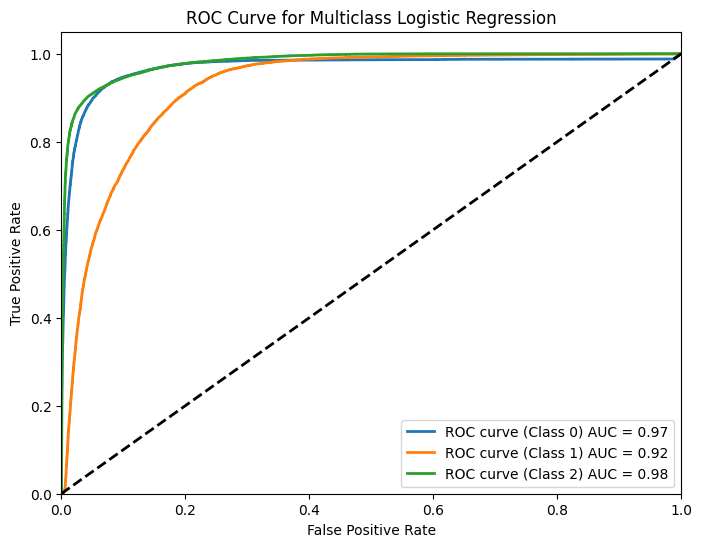

Class-wise AUC values: {0: 0.9689144109999751, 1: 0.9231694025413956, 2: 0.9810118809981999}


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Convert the labels to binary format
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute predicted probabilities for X_train_imputed and X_test_imputed
train_probabilities = logistic_model.predict_proba(X_train_imputed)
test_probabilities = logistic_model.predict_proba(X_test_imputed)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], train_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (Class %d) AUC = %0.2f' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Display AUC values
print("Class-wise AUC values:", roc_auc)



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model using the training data
naive_bayes_model.fit(X_train_imputed, y_train)

# Make predictions on the training and testing data
train_predictions_nb = naive_bayes_model.predict(X_train_imputed)
test_predictions_nb = naive_bayes_model.predict(X_test_imputed)

# Calculate the accuracy of the model on the training and testing data
train_accuracy_nb = accuracy_score(train_predictions_nb, y_train)
test_accuracy_nb = accuracy_score(test_predictions_nb, y_test)

# Print the accuracy of the model
print("Naive Bayes Training Accuracy:", train_accuracy_nb)
print("Naive Bayes Testing Accuracy:", test_accuracy_nb)


Naive Bayes Training Accuracy: 0.9916865671641791
Naive Bayes Testing Accuracy: 0.9914848484848485


In [ ]:
conditional_probabilities = np.exp(model.theta_)

<ipython-input-109-fa73509b595f>:1: RuntimeWarning: overflow encountered in exp
  conditional_probabilities = np.exp(model.theta_)


In [ ]:
print(classification_report(y_test, test_predictions_nb))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5866
           1       0.97      1.00      0.99      9633
           2       1.00      0.99      0.99     17501

    accuracy                           0.99     33000
   macro avg       0.99      0.99      0.99     33000
weighted avg       0.99      0.99      0.99     33000



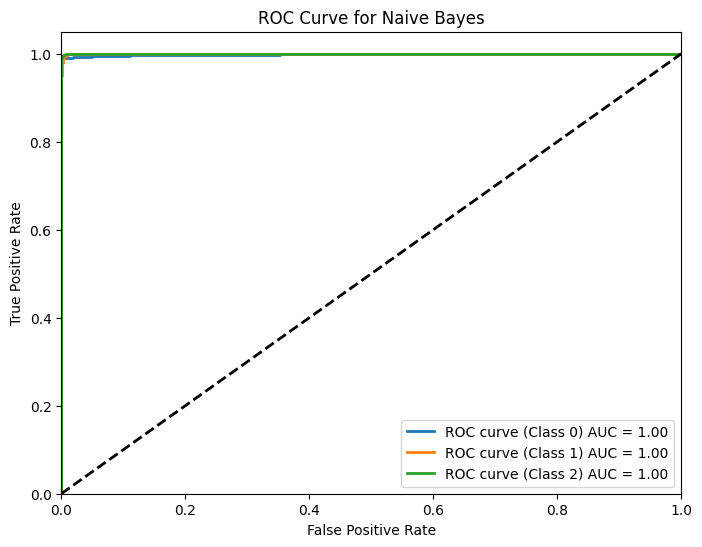

Class-wise AUC values: {0: 0.9984710310318319, 1: 0.9998591656987724, 2: 0.9999681361704718}


In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities for the test set
test_probabilities = model.predict_proba(X_test_imputed)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (Class %d) AUC = %0.2f' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Display AUC values
print("Class-wise AUC values:", roc_auc)


# KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)

knn_train_predictions = knn_model.predict(X_train_imputed)
knn_test_predictions = knn_model.predict(X_test_imputed)

knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
knn_test_accuracy = accuracy_score(knn_test_predictions, y_test)

print("KNeighborsClassifier Training Accuracy:", knn_train_accuracy)
print("KNeighborsClassifier Test Accuracy:", knn_test_accuracy)

KNeighborsClassifier Training Accuracy: 0.8309402985074626
KNeighborsClassifier Test Accuracy: 0.7183939393939394


In [ ]:
print(classification_report(y_test, knn_test_predictions))


              precision    recall  f1-score   support

           0       0.70      0.62      0.66      5866
           1       0.64      0.64      0.64      9633
           2       0.76      0.80      0.78     17501

    accuracy                           0.72     33000
   macro avg       0.70      0.68      0.69     33000
weighted avg       0.72      0.72      0.72     33000



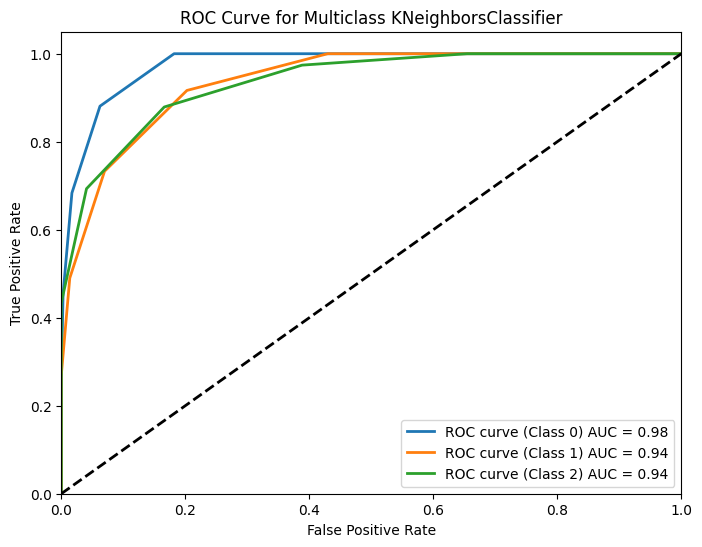

Class-wise AUC values: {0: 0.975001928870545, 1: 0.9369488518790048, 2: 0.9356135090766772}


In [ ]:
from sklearn.metrics import roc_curve, auc

# Binarize the labels using one-hot encoding
from sklearn.preprocessing import label_binarize
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Fit the model and predict probabilities
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)
train_probabilities = knn_model.predict_proba(X_train_imputed)
test_probabilities = knn_model.predict_proba(X_test_imputed)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], train_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (Class %d) AUC = %0.2f' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass KNeighborsClassifier')
plt.legend(loc='lower right')
plt.show()

# Display AUC values
print("Class-wise AUC values:", roc_auc)


# Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_imputed, y_train)

dt_train_predictions = dt_model.predict(X_train_imputed)
dt_test_predictions = dt_model.predict(X_test_imputed)

dt_train_accuracy = accuracy_score(dt_train_predictions, y_train)
dt_test_accuracy = accuracy_score(dt_test_predictions, y_test)

print("DecisionTreeClassifier Training Accuracy:", dt_train_accuracy)
print("DecisionTreeClassifier Test Accuracy:", dt_test_accuracy)

DecisionTreeClassifier Training Accuracy: 1.0
DecisionTreeClassifier Test Accuracy: 0.9995454545454545


In [ ]:
print(classification_report(y_test, dt_test_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



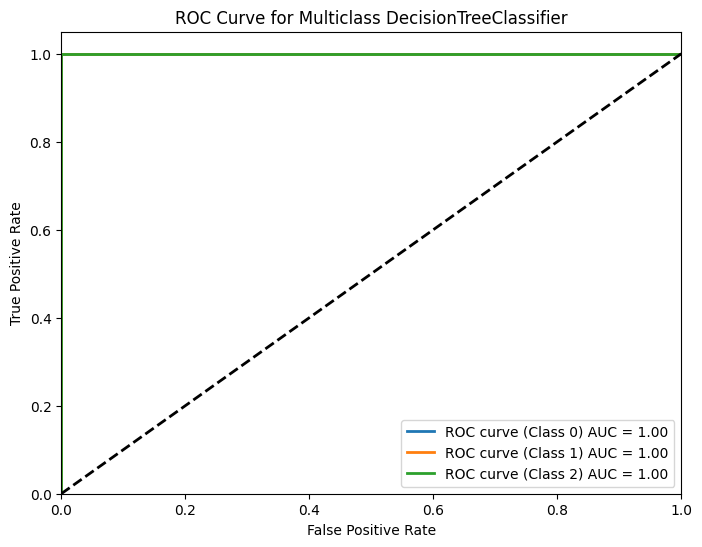

Class-wise AUC values: {0: 1.0, 1: 1.0, 2: 1.0}


In [ ]:
from sklearn.metrics import roc_curve, auc

# Binarize the labels using one-hot encoding
from sklearn.preprocessing import label_binarize
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Fit the model and predict probabilities
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_imputed, y_train)
train_probabilities = dt_model.predict_proba(X_train_imputed)
test_probabilities = dt_model.predict_proba(X_test_imputed)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], train_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (Class %d) AUC = %0.2f' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass DecisionTreeClassifier')
plt.legend(loc='lower right')
plt.show()

# Display AUC values
print("Class-wise AUC values:", roc_auc)


In [ ]:
#feature_importance = dt_model_model.feature_importances_
#feature_importance_rank = np.argsort(feature_importance)[::-1]

#for idx in feature_importance_rank:
#    print(f"Feature: {feature_names[idx]}, Importance: {feature_importance[idx]}")

# Support Vector Machine

In [ ]:
svc_model = LinearSVC()
svc_model.fit(X_train_imputed, y_train)

svc_train_predictions = svc_model.predict(X_train_imputed)
svc_test_predictions = svc_model.predict(X_test_imputed)

svc_train_accuracy = accuracy_score(svc_train_predictions, y_train)
svc_test_accuracy = accuracy_score(svc_test_predictions, y_test)

print("LinearSVC Training Accuracy:", svc_train_accuracy)
print("LinearSVC Test Accuracy:", svc_test_accuracy)

LinearSVC Training Accuracy: 0.9120597014925373
LinearSVC Test Accuracy: 0.9131818181818182


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(classification_report(y_test, svc_test_predictions))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91      5866
           1       0.90      0.80      0.85      9633
           2       0.90      1.00      0.95     17501

    accuracy                           0.91     33000
   macro avg       0.93      0.88      0.90     33000
weighted avg       0.92      0.91      0.91     33000



In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Define model names and predictions
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Linear SVC', 'KNN']
predictions = [logistic_model.predict(X_test_imputed),
               naive_bayes_model.predict(X_test_imputed),
               dt_model.predict(X_test_imputed),
               svc_model.predict(X_test_imputed),
               knn_model.predict(X_test_imputed)]

# Define true labels (assuming y_test is the true labels)
true_labels = y_test

# Initialize lists to store precision, recall, and F1-score for each model
precision_list = []
recall_list = []
f1_score_list = []

# Calculate precision, recall, and F1-score for each model
for prediction in predictions:
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, prediction, average='weighted')
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

# Create a pandas DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-score': f1_score_list
})

# Display the results
print("Performance Metrics by Model:")
print(results_df)


Performance Metrics by Model:
                 Model  Precision    Recall  F1-score
0  Logistic Regression   0.851485  0.851030  0.846770
1          Naive Bayes   0.991672  0.991485  0.991515
2        Decision Tree   0.999545  0.999545  0.999545
3           Linear SVC   0.916057  0.913182  0.911135
4                  KNN   0.716857  0.718394  0.716995


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Define model names and predictions
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Linear SVC', 'KNN']
predictions = [logistic_model.predict(X_test_imputed),
               naive_bayes_model.predict(X_test_imputed),
               dt_model.predict(X_test_imputed),
               svc_model.predict(X_test_imputed),
               knn_model.predict(X_test_imputed)]

# Define true labels (assuming y_test is the true labels)
true_labels = y_test

# Initialize an empty list to store dictionaries
results_list = []

# Calculate precision, recall, and F1-score for each class and each model
for model_name, prediction in zip(model_names, predictions):
    # Generate the classification report
    report = classification_report(true_labels, prediction, output_dict=True)

    # Extract precision, recall, and F1-score for each class
    for class_name, scores in report.items():
        if class_name == 'accuracy':
            continue
        results_list.append({'Model': model_name,
                             'Class': class_name,
                             'Precision': scores['precision'],
                             'Recall': scores['recall'],
                             'F1-score': scores['f1-score']})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
print("Performance Metrics by Model and Class:")
print(results_df)


Performance Metrics by Model and Class:
                  Model         Class  Precision    Recall  F1-score
0   Logistic Regression             0   0.907735  0.664166  0.767080
1   Logistic Regression             1   0.757877  0.744109  0.750930
2   Logistic Regression             2   0.884156  0.972516  0.926233
3   Logistic Regression     macro avg   0.849923  0.793597  0.814748
4   Logistic Regression  weighted avg   0.851485  0.851030  0.846770
5           Naive Bayes             0   0.996560  0.987726  0.992123
6           Naive Bayes             1   0.973671  0.998131  0.985749
7           Naive Bayes             2   0.999942  0.989086  0.994485
8           Naive Bayes     macro avg   0.990058  0.991648  0.990786
9           Naive Bayes  weighted avg   0.991672  0.991485  0.991515
10        Decision Tree             0   0.999148  0.999489  0.999318
11        Decision Tree             1   0.999481  0.999273  0.999377
12        Decision Tree             2   0.999714  0.999714  0.9